In [35]:
#import libraries
import numpy as np
import pandas as pd
import geopandas as gpd
import fiona
import matplotlib.pyplot as plt

# Read in shapefile
# Downloaded from https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_county_5m.zip

shape_data = gpd.read_file("https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_county_5m.zip")

shape_data.head(3)

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,39,071,01074048,0500000US39071,39071,Highland,06,1432479992,12194983,"POLYGON ((-83.86976 39.05553, -83.86568 39.247..."
1,06,003,01675840,0500000US06003,06003,Alpine,06,1912292630,12557304,"POLYGON ((-120.07248 38.50987, -120.07239 38.7..."
2,12,033,00295737,0500000US12033,12033,Escambia,06,1701544502,563927612,"POLYGON ((-87.62999 30.87766, -87.62946 30.880..."


In [5]:
# Filter to only counties in Illinois using StateFP column = 17 
shape_data = shape_data.loc[(shape_data['STATEFP'] == "17")]

shape_data.head(3)

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
3,17,101,00424252,0500000US17101,17101,Lawrence,06,963936864,5077783,"POLYGON ((-87.91028 38.57493, -87.90811 38.850..."
22,17,093,00424248,0500000US17093,17093,Kendall,06,829468028,5136619,"POLYGON ((-88.60349 41.71358, -88.60193 41.719..."
57,17,139,01784885,0500000US17139,17139,Moultrie,06,870123798,22102741,"POLYGON ((-88.81271 39.74049, -88.75784 39.739..."


In [6]:
# Read in BEP company address physical geocoded csv file
illinois_data = pd.read_csv("../IL_CEI/can-summer-2023/data/clean/bep_company_addresses_physical_geocoded.csv")
illinois_data.head()

,Company Name,Latitude,Longitude,Street,City,County,State,Confidence,Original Address
0,#1 Professional Cleaning Services,41.848017,-87.891201,2205 Mayfair Ave,Westchester,Cook County,IL,High,"2205 Mayfair, Westchester, IL"
1,"#9 Design, LLC",41.890007,-87.992682,524 W Saint Charles Rd,Villa Park,DuPage County,IL,High,"524 West Saint Charles Road, Villa Park, IL"
2,'Bouche' Enterprises LLC,41.943783,-87.812819,3511 N Osceola Ave,Chicago,Cook County,IL,High,"3511 North Osceola Avenue, Chicago, IL"
3,'Merica Made Painting & Decorating Corp.,41.779011,-87.771186,6221 S Austin Ave,Chicago,Cook County,IL,High,"6221 S Austin Ave, Chicago, IL"
4,*VDR Development Group,41.931275,-88.083132,168 N Brandon Dr,Glendale Heights,DuPage County,IL,High,"168 N Brandon Drive, Glendale Heights, IL"


In [33]:
# Filter to only states in Illinois and Group by County name to get total number of BEPs by County 
illinois_data = illinois_data.loc[(illinois_data['State'] == "IL")]
illinois_groupby = illinois_data.groupby('County').count()[['Original Address']].reset_index()
illinois_groupby.tail()

,County,Original Address
76,Whiteside County,2
77,Will County,197
78,Williamson County,2
79,Winnebago County,32
80,Woodford County,2


In [31]:
# Split County Column for an easy merge with shape_data dataframe
illinois_groupby[["County", "Counties_Split"]] = illinois_groupby['County'].str.split(' County', expand=True).astype(str)
#creates new columns for BP Numerator', 'BP Denominator and respectively splits Blood Pressure column data between them



#bep_data_df.head(30)
#il_county.groupby('var').count()[['single_var_need']].reset_index()
illinois_groupby

,County,Original Address,Counties_Split
0,Adams,7,
1,Boone,6,
2,Brown,1,
3,Bureau,1,
4,Carroll,1,
...,...,...,...
76,Whiteside,2,
77,Will,197,
78,Williamson,2,
79,Winnebago,32,


In [22]:
#sample = sample.rename(columns = {0: 'Counties'})
#sample


In [38]:
#merge ex and real_data
# illinois_groupby_pro = pd.merge(illinois_groupby, sample, left_index = True, right_index =True)
#illinois_groupby_pro['County'].unique()
# illinois_groupby_pro['County'].count()
#illinois_groupby_pro

81

In [27]:
# Rename the Column "NAME" to "County"

shape_data = shape_data.rename(columns = {'NAME': 'County'})




102

In [26]:
# Merge illinois_groupby dataframe with shape_data dataframe
shape_data_full = shape_data.merge(illinois_groupby, on="County")
shape_data_full

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,County,LSAD,ALAND,AWATER,geometry,Original Address,Counties_Split
0,17,093,00424248,0500000US17093,17093,Kendall,06,829468028,5136619,"POLYGON ((-88.60349 41.71358, -88.60193 41.719...",11,
1,17,049,00424226,0500000US17049,17049,Effingham,06,1239970330,3183217,"POLYGON ((-88.80532 39.21626, -88.47091 39.215...",3,
2,17,103,00424253,0500000US17103,17103,Lee,06,1877336056,10634483,"POLYGON ((-89.63147 41.75813, -89.63026 41.843...",1,
3,17,107,00424255,0500000US17107,17107,Logan,06,1600795502,2252736,"POLYGON ((-89.60298 40.32013, -89.26374 40.325...",2,
4,17,115,00424256,0500000US17115,17115,Macon,06,1503684098,13406667,"POLYGON ((-89.21785 39.91699, -89.14345 39.917...",14,
...,...,...,...,...,...,...,...,...,...,...,...,...
75,17,195,01785167,0500000US17195,17195,Whiteside,06,1772158753,31836569,"POLYGON ((-90.23677 41.76260, -90.24717 41.762...",2,
76,17,025,00424214,0500000US17025,17025,Clay,06,1212815749,3271820,"POLYGON ((-88.69517 38.82630, -88.69353 38.914...",1,
77,17,147,00424275,0500000US17147,17147,Piatt,06,1137399517,755574,"POLYGON ((-88.74516 40.05519, -88.74534 40.098...",2,
78,17,181,01785113,0500000US17181,17181,Union,06,1070856127,22502069,"POLYGON ((-89.52173 37.56621, -89.52157 37.570...",2,


<Axes: >

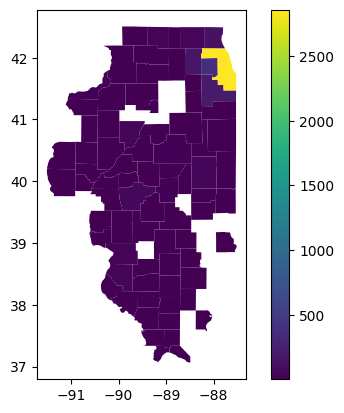

In [45]:
shape_data_full.plot(column='Original Address',legend=True)

<Axes: >

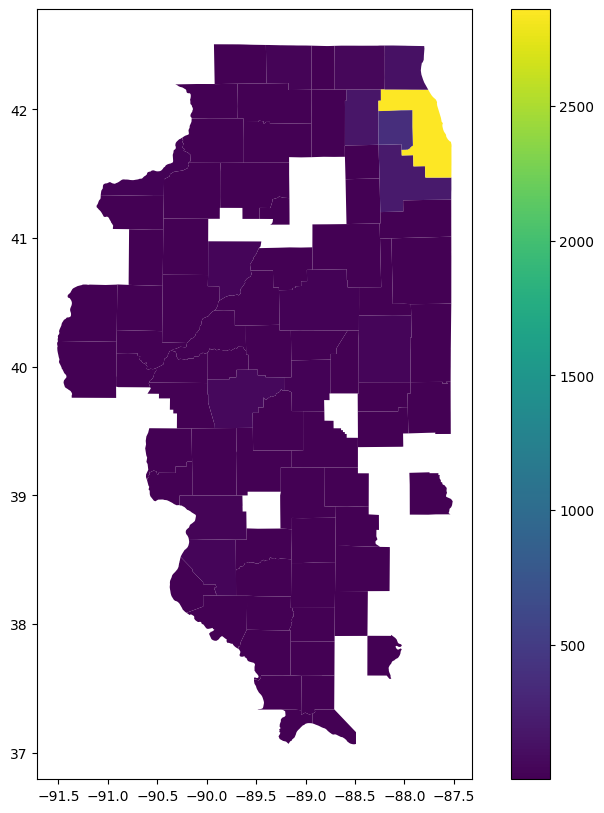

In [38]:
fig, ax = plt.subplots(figsize=(10, 10))
shape_data_full.plot(ax=ax,column='Original Address',legend=True)

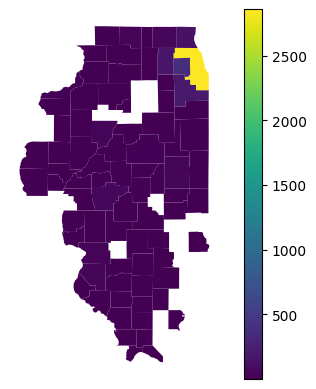

In [42]:
# to remove the box

ax = shape_data_full.plot(column='Original Address',legend=True)
ax.set_axis_off()


<Axes: >

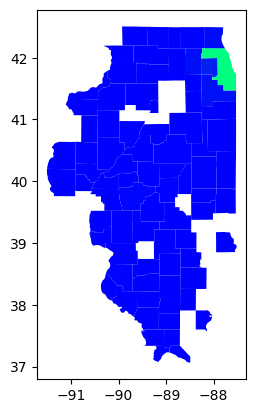

In [44]:
shape_data_full.plot(column='Original Address',  cmap='winter')

In [45]:
#How to plot interactive maps where something is plotted

import geoviews
geoviews.extension("bokeh")

#price is variable of interest

choropleth = geoviews.Polygons(data=shape_data_full, vdims=["Original Address","GEOID"])

choropleth.opts(height=600, width=900, title="NYC Airbnb Price",
                tools=["hover"], cmap="Greens", colorbar=True, colorbar_position="bottom")

ModuleNotFoundError: No module named 'geoviews'